<a href="https://colab.research.google.com/github/Matceo/SyS./blob/main/Serie%26TransformadaDeFourier./S%26S%3AParcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

wo= 1.0
Fo= 1.5707963267948966


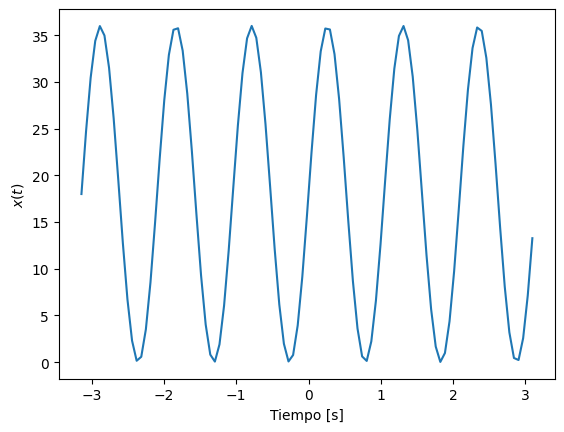

In [9]:
#Ejercicio1

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,IntSlider

ti=-np.pi #Tiempo inicial
tf=np.pi #Tiempo final
wo=2*np.pi/(tf-ti) #Frecuencia angular
Fo=wo/2*np.pi #Frecuencia fundamental
print('wo=', wo)
print('Fo=', Fo)
Fs=10*Fo #Frecuencia muestreo -> debe respetar Nyquist: Fs>=2Fo
tv=np.arange(ti, tf, 1/Fs) #Vector de tiempo
x=abs(6*np.sin(3*tv+(np.pi/4)))**2 #Señal de entrada
plt.plot(tv, x) #Gráfica de la señal
plt.xlabel('Tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

In [10]:
#Se crean las bases de la Serie Exponencial Compleja de Fourier.
T=tf-ti #Intervalo de interés
N=20 #Número armonicos a simular
wo=2*np.pi/T #Frecuencia fundamental
#Definimos las bases:
phin=np.zeros((len(tv), 2*N+1), dtype=np.complex_) #Crear matriz para guardar bases
for n in range(-N, N+1, 1):
    phin[:, n+N]=np.exp(1j*n*wo*tv) #Base Exponencial Compleja de Fourier en el intérvalo de interés.
#Para graficar las bases:
def pltbase(n=1):
    plt.plot(tv, np.real(phin[:, int(n+N)]), label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]", fontsize = 14)
    plt.ylabel("$\phi_n$(t)", fontsize= 14)
    plt.plot(tv, np.imag(phin[:, int(n+N)]), label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase, n=(-N,N,1))
plt.show()

interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

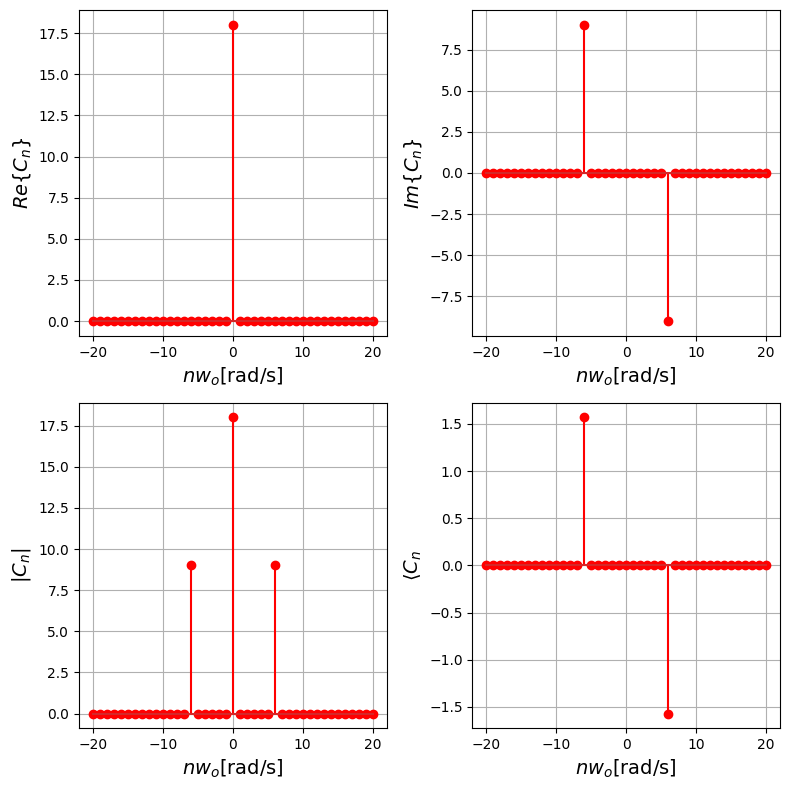

In [11]:
#Calcular el espectro y cambiar según la señal estudiada:
cn=np.zeros(2*N+1, dtype=np.complex_)
nv=np.linspace(-N, N, 2*N+1) #Vector de armónicos
cn[N]=18 #Nivel DC de C0
cn[N-6]=9j #Armónico -6
cn[N+6]=-9j #Armónico 6
#Graficar espectro:
fig=plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.stem(nv, np.real(cn), 'r') #Gráfica de la parte real del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$Re\{C_n\}$', fontsize=14)
plt.axis('tight')
plt.grid()
plt.subplot(2, 2, 2)
plt.stem(nv, np.imag(cn), 'r') #Grafica de la parte imaginaria del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$Im\{C_n\}$', fontsize=14)
plt.axis('tight')
plt.grid()
plt.subplot(2, 2, 3)
plt.stem(nv, abs(cn), 'r') #Magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)
plt.axis('tight')
plt.grid()
plt.subplot(2, 2, 4)
plt.stem(nv, np.angle(cn), 'r') #Fase del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$\langle C_n$', fontsize=14)
plt.axis('tight')
plt.grid()
fig.tight_layout()
plt.show()

In [12]:
Px=486 #Potencia de la señal x(t)
def pltest(Na=1):
    ind=range(N-Na, N+Na+1)
    er=1-np.sum(abs(cn[ind])**2)/Px
#Señal reconstruida:
    xe=phin[:, ind].dot(cn[ind]) #dot calcula el producto punto entre vectores
    plt.plot(tv, xe, color='b', label='$x_e(t)$') #Señal estimada o filtrada
    plt.plot(tv, x, color='r', label='$x(t)$') #Señal original
    plt.title('ER=%.2f[%%]'%(100*er), fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest, Na=(1, N, 1))
plt.show()

interactive(children=(IntSlider(value=1, description='Na', max=20, min=1), Output()), _dom_classes=('widget-in…